In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
api_key = 'd4839af10a154cbd9977a97d26860a17'
url = 'https://newsapi.org/v2/everything'
params = {
    'q': 'Bitcoin',  # Query keyword
    'apiKey': api_key,
    'sources':(
    "bbc-news,cnn,fox-news,nbc-news,the-new-york-times,usa-today,independent,daily-mail,bbc.co.uk,"
    "techcrunch.com,engadget.com,cbc-news,the-hindu,the-times-of-india,google-news-ca"
)
}

In [3]:
def fetch_articles(url, params):
    response = requests.get(url, params=params)
    if response.status_code == 200:
        return response.json()
    else:
        raise Exception(f"Error: {response.status_code}")

In [4]:
data = fetch_articles(url, params)

articles = data['articles']
df = pd.DataFrame(articles)

In [5]:
print(df.head())

                                   source  \
0  {'id': 'nbc-news', 'name': 'NBC News'}   
1       {'id': None, 'name': '[Removed]'}   
2       {'id': None, 'name': '[Removed]'}   
3  {'id': 'nbc-news', 'name': 'NBC News'}   
4       {'id': None, 'name': '[Removed]'}   

                                          author  \
0  Ryan Browne, CNBC and MacKenzie Sigalos, CNBC   
1                                           None   
2                                           None   
3                                   David Ingram   
4                                           None   

                                               title  \
0  Mt. Gox begins repaying bitcoin to creditors a...   
1                                          [Removed]   
2                                          [Removed]   
3  Russia operated nearly 1,000 sock puppet accou...   
4                                          [Removed]   

                                         description  \
0  The trustee for Mt. 

In [6]:
print(f"Number of articles retrieved: {len(df)}")
print("Columns in the DataFrame:", df.columns)

Number of articles retrieved: 97
Columns in the DataFrame: Index(['source', 'author', 'title', 'description', 'url', 'urlToImage',
       'publishedAt', 'content'],
      dtype='object')


In [7]:
# Analysis: Most frequent sources
source_counts = df['source'].apply(lambda x: x['name']).value_counts()
print("\nMost frequent sources:\n", source_counts.head())


Most frequent sources:
 source
The Times of India    76
[Removed]             10
NBC News               5
Fox News               2
BBC News               2
Name: count, dtype: int64


In [8]:
# Analysis: Most common keywords in titles
df['title'] = df['title'].fillna('')
keywords = df['title'].str.cat(sep=' ').lower().split()
keyword_counts = pd.Series(keywords).value_counts()
print("\nMost common keywords in titles:\n", keyword_counts.head(10))


Most common keywords in titles:
 bitcoin    37
to         31
on         26
crypto     22
as         16
up         15
price      15
in         12
dollar     12
for        12
Name: count, dtype: int64


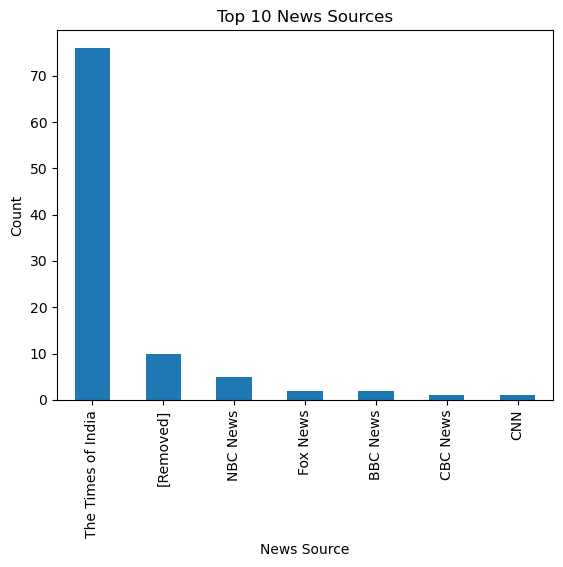

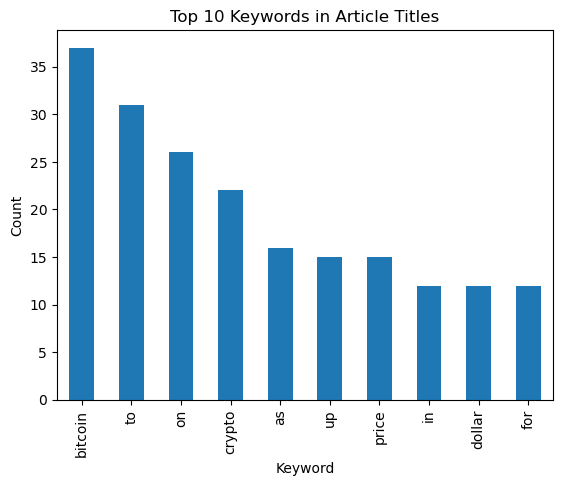

In [9]:
# Plot most frequent sources
source_counts.head(10).plot(kind='bar', title='Top 10 News Sources')
plt.xlabel('News Source')
plt.ylabel('Count')
plt.show()

# Plot most common keywords
keyword_counts.head(10).plot(kind='bar', title='Top 10 Keywords in Article Titles')
plt.xlabel('Keyword')
plt.ylabel('Count')
plt.show()